In [1]:
# External
import mne
import numpy as np

import double_dipper
from double_dipper.constants import *

In [2]:
def divider(metadata):
    return (metadata["epoch"], metadata["condition"], metadata["darkening"])
labeller = lambda metadata: 0

In [3]:
subjNos = [i for i in range(1,11+1) if i != 5]
pairs = double_dipper.io.filePairs(*[f"cleaned/main/{i}" for i in subjNos])
dataset = double_dipper.io.partition(divider, labeller, pairs)

In [4]:
list(dataset.keys())

[(82, 'C2', True),
 (109, 'C2', False),
 (44, 'C1', True),
 (4, 'C1', False),
 (72, 'C2', True),
 (32, 'C1', False),
 (62, 'C2', True),
 (15, 'C1', False),
 (36, 'C1', False),
 (7, 'C1', False),
 (41, 'C1', False),
 (92, 'C2', True),
 (34, 'C1', True),
 (98, 'C2', False),
 (97, 'C2', False),
 (90, 'C2', True),
 (1, 'C1', True),
 (77, 'C2', False),
 (33, 'C1', False),
 (24, 'C1', True),
 (70, 'C2', True),
 (76, 'C2', False),
 (26, 'C1', True),
 (25, 'C1', True),
 (6, 'C1', False),
 (60, 'C2', True),
 (51, 'C1', True),
 (18, 'C1', True),
 (47, 'C1', True),
 (73, 'C2', True),
 (69, 'C2', False),
 (63, 'C2', False),
 (5, 'C1', True),
 (20, 'C1', False),
 (100, 'C2', True),
 (81, 'C2', False),
 (23, 'C1', True),
 (58, 'C2', False),
 (9, 'C1', True),
 (14, 'C1', False),
 (40, 'C1', False),
 (65, 'C2', True),
 (94, 'C2', True),
 (89, 'C2', True),
 (17, 'C1', False),
 (21, 'C1', True),
 (0, 'C1', True),
 (31, 'C1', False),
 (84, 'C2', False),
 (87, 'C2', False),
 (95, 'C2', True),
 (86, 'C2', 

In [5]:
sfreq = double_dipper.constants.sfreq
channel_names = double_dipper.constants.channel_names
info = mne.create_info(channel_names, sfreq, ch_types=["eeg"]*len(channel_names))

In [6]:
event_color = { problem.code: "b", darkening.code: "k", strategy_prompt.code: "y", tone.code: "r"}

events = [darkening, problem, tone]
events = np.stack([e.occurrence for e in events])

In [18]:
def quickPlot(data, event_id):
    %matplotlib notebook
    mne.viz.plot_raw(data, events,
                    highpass=1, lowpass=32,
                    event_color=event_color,
                    event_id=event_id,
                    start=tone.delay - 0.5,duration=darkening.delay - tone.delay + 1);

## C1 --> C2

### C1, with Darkening

Notice we skip over epoch 0 -- the first epoch. Too many subjects had pronounced reactions to the first tone/darkening.

In [14]:
def pred(key):
    (epoch, cond, darkening) = key
    if cond != "C1": return False
    if not darkening: return False
    return 50 < epoch
    #return 0 < epoch and epoch < 20

In [15]:
subset = double_dipper.dataset.subset(pred, dataset)

In [16]:
event_id = {"darkening": darkening.code, "tone": tone.code, "problem": problem.code}

Creating RawArray with float64 data, n_channels=4, n_times=5632
    Range : 0 ... 5631 =      0.000 ...    21.996 secs
Ready.
Setting up band-pass filter from 1 - 32 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 32.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


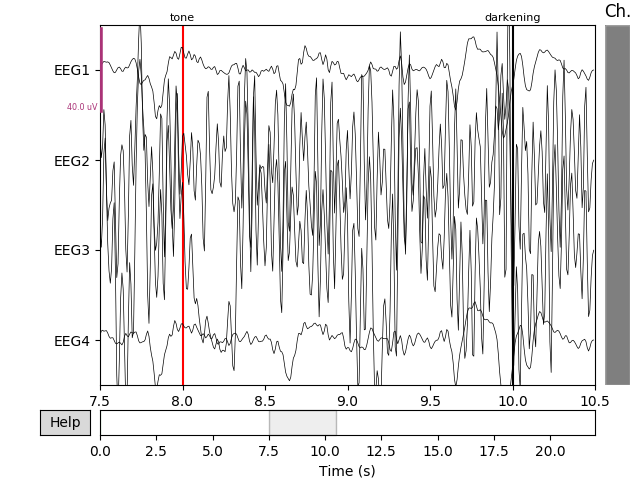

Creating RawArray with float64 data, n_channels=4, n_times=5632
    Range : 0 ... 5631 =      0.000 ...    21.996 secs
Ready.
Setting up band-pass filter from 1 - 32 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 32.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


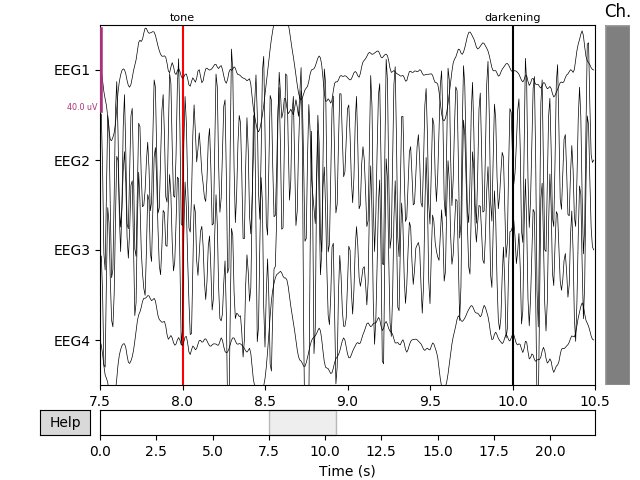

Creating RawArray with float64 data, n_channels=4, n_times=5632
    Range : 0 ... 5631 =      0.000 ...    21.996 secs
Ready.
Setting up band-pass filter from 1 - 32 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 32.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


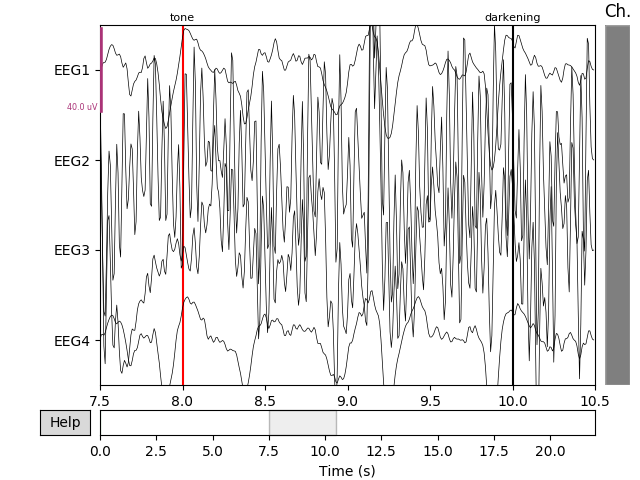

In [19]:
keys = sorted(subset.keys(), key = lambda k: k[0])
for k in keys[:3]:
    averaged = np.mean(subset[k]["x"], axis=0)
    averaged = mne.io.RawArray(averaged, info)
    quickPlot(averaged, event_id)